# Impor Dataset ke Jupyter Notebook

In [ ]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("khushikyad001/covid-19-global-dataset")
print(path)
print(os.listdir(path))

/kaggle/input/covid-19-global-dataset
['synthetic_covid19_data.csv']


# Impor Library yang Diperlukan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Memuat dan Memulai Proses Awal Pengolahan Dataset

In [ ]:
# memuat data
df = pd.read_csv(os.path.join(path,'synthetic_covid19_data.csv'))

# mengambil kolom yang diperlukan
df = df[['location', 'total_cases', 'total_deaths']]

# membuat label klasifikasi: Ringan(0), Sedang(1), Parah(2)
def classify_status(row):
    if row['total_cases'] >= 7_000_000 and row['total_deaths'] <= 370_000:
        return 2 # Parah
    elif row['total_cases'] >= 3_000_000 and row['total_deaths'] >= 150_000:
        return 1 # Sedang
    else:
        return 0 # Ringan

df['Status Kasus'] = df.apply(classify_status, axis=1)

# memisah fitur dan label
X = df[['total_cases', 'total_deaths']]
y = df['Status Kasus'].values

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Mengecek Distribusi Data dalam Dataset

In [ ]:
print(df[['total_cases', 'total_deaths']].describe())

        total_cases   total_deaths
count  3.000000e+03    3000.000000
mean   4.970822e+06  252170.073000
std    2.840551e+06  142288.916742
min    1.729700e+04      74.000000
25%    2.602631e+06  131482.500000
50%    4.944837e+06  255026.000000
75%    7.356497e+06  373209.500000
max    9.993726e+06  499920.000000


# Membangun dan Melatih Model ANN

In [ ]:
# membangun model
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(12, activation='relu'))
model.add(Dense(3, activation='softmax'))

# mengompilasi model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# melatih model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4784 - loss: 1.1030 - val_accuracy: 0.7292 - val_loss: 0.7899
Epoch 2/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8094 - loss: 0.6534 - val_accuracy: 0.8167 - val_loss: 0.4457
Epoch 3/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8661 - loss: 0.3639 - val_accuracy: 0.8333 - val_loss: 0.3523
Epoch 4/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8950 - loss: 0.2779 - val_accuracy: 0.8750 - val_loss: 0.2788
Epoch 5/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9183 - loss: 0.2188 - val_accuracy: 0.8750 - val_loss: 0.2474
Epoch 6/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9246 - loss: 0.1955 - val_accuracy: 0.9125 - val_loss: 0.2288
Epoch 7/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9429 - loss: 0.1587 - val_accuracy: 0.9083 - val_loss: 0.2133
Epoch 8/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9426 - loss: 0.1566 - val_accuracy: 0.9167

# Mengevaluasi Model

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Akurasi Data Uji: {acc * 100:.2f}%")

pred = model.predict(X_test)
pred_labels = np.argmax(pred, axis=1)

print("Label Asli: ", y_test[:10])
print("Label Prediksi: ", pred_labels[:10])

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9911 - loss: 0.0301  
Akurasi Data Uji: 98.33%
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Label Asli:  [2 1 0 0 1 0 2 0 0 2]
Label Prediksi:  [2 1 0 0 1 0 2 0 0 2]


# Memvisualisasikan Akurasi dan Loss

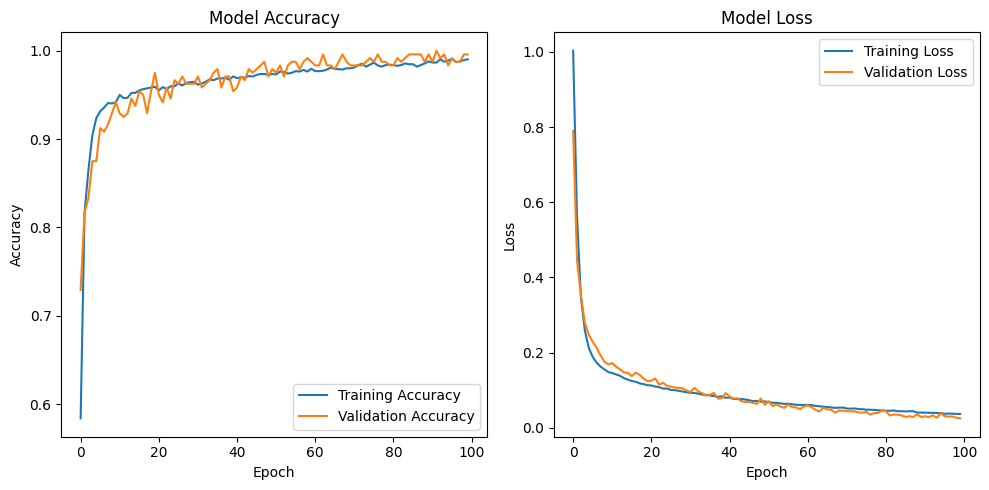

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Memprediksi dan Mengevaluasi Seluruh Data

In [ ]:
X_scaled_full = scaler.transform(X)

predictions = model.predict(X_scaled_full)
predictions_labels = np.argmax(predictions, axis=1)

label_map = {0: 'Ringan', 1: 'Sedang', 2: 'Parah'}

for i, (fitur, target, pred) in enumerate(zip(X_scaled_full, y, predictions_labels)):
    print(f"Data ke-{i+1}: Total Kasus ={fitur[0]:,.0f}, Total Kematian={fitur[1]:.0f}")
    print(f"  Status Asli : {label_map[target]}")
    print(f"  Prediksi    : {label_map[pred]}\n")

Output streaming akan dipotong hingga 5000 baris terakhir.
Data ke-1751: Total Kasus =1, Total Kematian=-0
  Status Asli : Parah
  Prediksi    : Parah

Data ke-1752: Total Kasus =-1, Total Kematian=-0
  Status Asli : Ringan
  Prediksi    : Ringan

Data ke-1753: Total Kasus =1, Total Kematian=1
  Status Asli : Sedang
  Prediksi    : Sedang

Data ke-1754: Total Kasus =0, Total Kematian=-2
  Status Asli : Ringan
  Prediksi    : Ringan

Data ke-1755: Total Kasus =-1, Total Kematian=0
  Status Asli : Ringan
  Prediksi    : Ringan

Data ke-1756: Total Kasus =0, Total Kematian=-1
  Status Asli : Sedang
  Prediksi    : Sedang

Data ke-1757: Total Kasus =1, Total Kematian=-1
  Status Asli : Parah
  Prediksi    : Parah

Data ke-1758: Total Kasus =-1, Total Kematian=1
  Status Asli : Sedang
  Prediksi    : Sedang

Data ke-1759: Total Kasus =-1, Total Kematian=-1
  Status Asli : Ringan
  Prediksi    : Ringan

Data ke-1760: Total Kasus =-0, Total Kematian=0
  Status Asli : Sedang
  Prediksi    : Se

# Confusion Matrix dan Classification Report

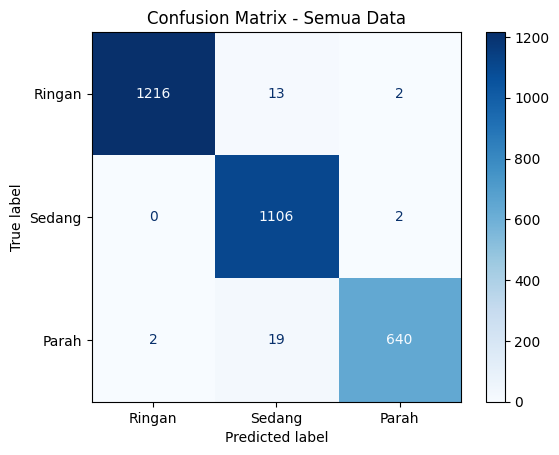

              precision    recall  f1-score   support

      Ringan       1.00      0.99      0.99      1231
      Sedang       0.97      1.00      0.98      1108
       Parah       0.99      0.97      0.98       661

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [ ]:
cm = confusion_matrix(y, predictions_labels, labels=[0, 1, 2])
disp =ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ringan', 'Sedang', 'Parah'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Semua Data')
plt.show()

print(classification_report(y, predictions_labels, labels=[0, 1, 2], target_names=['Ringan', 'Sedang', 'Parah'], zero_division=0))

# Analisa Studi Kasus

## Terkait Dataset
Dataset yang digunakan merupakan data COVID-19 global sintetis yang didapat dari situs penyedia dataset secara publik, [Kaggle](https://www.kaggle.com/), tepatnya dari dataset unggahan seorang pengguna bernama Kushi Yadav pada [tautan berikut](https://www.kaggle.com/datasets/khushikyad001/covid-19-global-dataset). Dalam dataset tersebut, ada banyak kolom data yang dapat digunakan, namun saya mencoba mengambil tiga jenis data saja, yakni negara terjadinya kasus (`location`), total kasus yang tercatat (`total_cases`), dan total kematian yang terjadi (`total_deaths`).

## Tujuan Proyek
Tujuan dari proyek ini adalah mengembangkan model klasifikasi untuk menentukan tingkat keparahan pandemi COVID-19 di suatu negara berdasar jumlah kasus dan kematian total. kategori keparah dibagi tiga:

*   Ringan (0): jumlah kasus dan kematian relatif rendah.
*   Sedang (1): jumlah kasus dan kematian menengah. Ditetapkan pada batas ≥ 3.000.000 kasus dan ≥ 150.000 kematian.
*   Parah (2): jumlah kasus dan kematian tinggi. Ditetapkan pada batas ≥ 7.000.000 kasus dan ≥ 370.000 kematian.

## Metodologi


1.   **Pra-pemrosesan data**
*   memilih kolom penting (`total cases`, `total_deaths`)
*   menstandarkan fitur menggunakan `StandardScaler`
2.   **Klasifikasi**
*   membuat label klasifikasi keparahan menggunakan aturan threshold logis berbasis distribusi statistik dataset.
3.   **Model**
*   menggunakan **model Neural Network (ANN)** dengan arsitektur sederhana: dua _hidden layer_ (`relu`) dan _output layer_ (`softmax`)
*   melatih model menggunakan `categorical_crossentropy` dan `Adam optimizer`
4.   **Evaluasi**
*   menggunakan akurasi, _confusion matrix_, dan _classification report_ untuk menilai performa model

## Hasil
1. Model menunjukkan akurasi sekitar **98,33%** pada data uji.
2. Dari _confusion matrix_, terlihat bahwa model cukup mampu membedakan ketiga kategori, meskipun kemungkinan terdapat ketidakseimbangan jumlah data antar kelas.
Grafik **akurasi dan loss** menunjukkan bahwa model stabil sejak awal pelatihan dan mencapai performa maksimal bahkan sebelum 20 _epoch_, yang hanya merupakan seperlima dari total _epoch_ yang dijadwalkan. Selain itu, model tidak menunjukkan gejala _overfitting_ yang signifikan.

## Analisis
1. Model cukup efektif dalam memetakan pola hubungan antara banyaknya kasus dan kematian terhadap tingkat keparahan.
2. Negara-negara dengan jumlah kasus di atas 7 juta dan kematian lebih dari 370.000 umumnya diklasifikasikan sebagai "Parah", sesuai harapan.
3. Kategorisasi memberikan tantangan lebih karena bisa jadi rentang nilainya masih sempit dan tumpang tindih.
4. Model sederhana ini dapat ditingkatkan dengan misalnya:
* menambahkan fitur lain seperti **jumlah penduduk**, **tanggal pencatatan data**, atau **jumlah kasus aktif**.
* mencoba algoritma klasifikasi lain untuk perbandingan
* Melakukan _hyperparameter tuning_ dan _balancing_ kelas untuk menghindari bias pada kelas dominan


## Catatan Tambahan
Sebenarnya, kategorisasi yang ditentukan saat awal menyusun model itu hanya dua jenis saja, "Parah" dan "Tidak Parah". Namun, pendekatan tersebut dirasa terlalu kasar dan kurang informatif, sehingga dilakukan revisi dengan menambahkan satu kategori lagi (Sedang) dan memperbaiki nilai ambang batas untuk setiap kategori berdasarkan analisis lebih lanjut terhadap data.